# Pp4KO mitotic defects analysis

- These values were manually anotated from Imaris and normalization/calculations were done in excel.
- These values are then plotted using `seaborn` `stripplots` and `boxplots`.
- Statistical tests are done and recorded in a summary table at the end of the notebook.  

In [1]:
# Loading in standard libraries and functions

### --- REMOVE PRINT FUNCTION: --- ### 

# Makes it so any variable or statement on it's own line gets printed w/o print()
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

### --- IMPORT LIBRARIES: --- ###

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
from scipy import stats
#import altair as alt
import os
import glob
import matplotlib.patches as mpatches
# We're also going to tell Jupyter to use inline plotting instead of notebook plotting
# It basically means you don't have to use plt.show() in every cell
%matplotlib inline
import re

### --- CONJ 510 SUMMARY TABLES: --- ### 

def percentile(n):
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_

#summary = fil.groupby('condition').agg(['mean', 'std', 'min', 'max', 'median', percentile(25), percentile(75), 'skew'])
#summary

### --- IMPORT SCIPY T TEST: --- ###

from math import sqrt
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from scipy.stats import sem
from scipy.stats import t

### --- IND. T-TEST FUNCTION: --- ###
# source: https://machinelearningmastery.com/how-to-code-the-students-t-test-from-scratch-in-python/

def independent_ttest(data1, data2, alpha):
    # calculate means
    mean1, mean2 = mean(data1), mean(data2)
    # calculate standard errors
    se1, se2 = sem(data1), sem(data2)
    # standard error on the difference between the samples
    sed = sqrt(se1**2.0 + se2**2.0)
    # calculate the t statistic
    t_stat = (mean1 - mean2) / sed
    # degrees of freedom
    df = len(data1) + len(data2) - 2
    # calculate the critical value
    cv = t.ppf(1.0 - alpha, df)
    # calculate the p-value
    p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
    # return everything
    return t_stat, df, cv, p

### --- 3D CARTESIAN DISTANCE FUNCTION: --- ###

# AB = sqrt((x2 - x1)^2  +   (y2 - y1)^2   +   (z2 - z1)^2)

def cart3D_dist(x1, x2, y1, y2, z1, z2):
    x_dif = x2-x1
    y_dif = y2-y1
    z_dif = z2-z1
    x_sqr = x_dif**2
    y_sqr = y_dif**2
    z_sqr = z_dif**2
    dist = sqrt(x_sqr + y_sqr + z_sqr)
    return dist

### --- FINDING UNIQUE COMBINATIONS FUNCTION: --- ###

# Based on the mathematical concept of finding unique combinations without selecting the same option again. 
# n is the dataset to be pulled from
# r is the number of data to select from the dataset 
def find_combos(n, r):
    return (math.factorial(n))/((math.factorial(r))*(math.factorial(n-r)))

### --- ANGLE BETWEEN TWO 2D LINES FUNCTION: --- ###

import math

# defining function for calculating angle of rotation between 2 2D lines
def find_angle(m1, m2): 
    angle = math.degrees(math.atan(abs((m1 - m2)/(1 + m1*m2))))
    return angle

### --- SLOPE BETWEEN TWO POINTS ON A 2D LINE FUNCTION: --- ###

# defining a function to calculate slope

def find_slope(y2, y1, x2, x1):
    m = (y2 - y1)/(x2 - x1)
    return m

### --- SET UP FOR A FIGURE: --- ###

# fig1, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(ncols = 2,
#                                                         nrows = 3,
#                                                         sharex = False,
#                                                         sharey = True,
#                                                         figsize = (40,50))

#titlefont = 40 # sets font size 
#axisfont = 30
#plt.rc('xtick', labelsize=25) 
#plt.rc('ytick', labelsize=25) 
#palette = ['#5DADE2', '#EC7063', '#F8C471']
#fig_title = 'ACD Timing in WT and pp4KO neuroblasts'


### --- SET UP FOR CUSTOM LEGENDS --- ###

#colors = ["g", "w"]
#texts = ["Green Data Description", "RedData Description"]
#patches = [ mpatches.Patch(color=colors[i], label="{:s}".format(texts[i]) ) for i in range(len(texts)) ]
#plt.legend(handles=patches, bbox_to_anchor=(0.5, 0.5), loc='center', ncol=2 )


### --- color palettes --- ###

# p = ['#3386FF', '#FF5733'] # classic blue and orange from the rotation saga
# ['#3386FF', '#143566', 'grey'] # hex codes for blue, dark blue, grey
# ['#FF5733', '#99341e', 'grey'] # hex codes for orange, dark orange, grey

### --- PLOT STYLES: --- ###

plt.style.use('fast') # uses seaborn style
#sns.set_style('white') # uses blank white background style (to copy PRISM)

### --- REMOVING DATAFRAME VIEW LIMITS --- ###
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## Command line cells to ensure code is in right directory. 
1. The first cell calls `pwd`, which returns the current working directory that the code is working in. 
2. The second cell calls `ls`, which returns the list of files in the current directory.
3. The third cell sets the home directory to a variable, and sets the figure directory to another one.  

In [2]:
pwd

'/Users/rcsegura/Desktop/SuppFig1'

In [3]:
ls

SuppFig1 data.xlsx               ~$2024-12-03 Fig1 metadata.xlsx
SuppFig1.ipynb                   ~$Fig1 metadata.xlsx
SuppFig5_PP4 RNAi_2025-02-24.ai


In [4]:
home_dir = '/Users/rcsegura/Desktop/SuppFig1' # home directory
#figs_dir = home_dir + '/figs/' # enable and make folder if figures are to be saved
#data_dir = home_dir + '/data/' # directory holding the data
#outs_dir = home_dir + '/output/' # directory to save any output csv files to 

## Calling in the data

In [5]:
# reading in data
os.chdir(home_dir)
data = pd.read_excel('SuppFig1 data.xlsx')
data.head(5)

,file,genotype,# Nb,# div,movie length (hr),div/hour,% mitotic Nb
0,2020-07-07_1_asl-gfp_cherry-jupiter - position...,WT,12,8,1.5,5.333333,0.666667
1,2020-07-07_1_asl-gfp_cherry-jupiter - position...,WT,16,11,1.5,7.333333,0.687500
2,2020-07-07_3_Asl-GFP_Cherry-Jupiter_02 - Posit...,WT,12,7,1.5,4.666667,0.583333
3,2020-09-24_3_pp4KO-187_Asl-GFP_Cherry-Jupiter_...,PP4KO,18,12,1.5,8.000000,0.666667
4,2020-09-24_4_pp4KO-187_Asl-GFP_Cherry-Jupiter_...,PP4KO,16,10,1.5,6.666667,0.625000


## Plotting the data

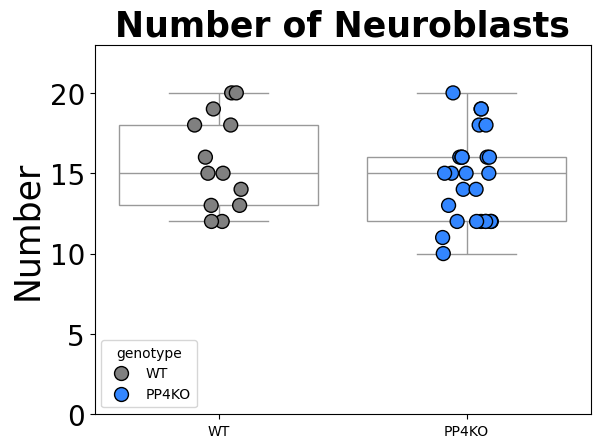

In [6]:
# plotting

p = ['grey', '#3386FF'] # sets palette
axes_title = 25 # axes title size
tick_size = 20 # axes tick size
title = 'Number of Neuroblasts' # graph title
title_size = 25 # graph title size

# generates stripplot
sns.stripplot(data = data, y = '# Nb', x = 'genotype',
             hue = 'genotype', dodge = False,
             hue_order = ['WT', 'PP4KO'], palette = p,
             size = 10, edgecolor = 'k', linewidth = 1,
             legend = True)

# generates boxplots
sns.boxplot(data = data, y = '# Nb', x = 'genotype',
             hue = 'genotype', dodge = False,
             hue_order = ['WT', 'PP4KO'], palette = ['w', 'w'], 
           legend = False)

plt.xlabel('') # removes x axis label
plt.ylabel('Number', fontsize = axes_title) # modifies y axis label
plt.yticks(size = tick_size) # sets y-tick size to match assigned value
plt.title(title, fontsize = title_size, fontweight = 'bold') # sets title parameters
plt.ylim(0,23)

# saving figure
#os.chdir(figs_dir)
#plt.savefig('AC-Cytoplasm Ratio, WT and recomb.png', dpi = 600, bbox_inches = 'tight')
#plt.savefig('Nb count.svg', dpi = 600, bbox_inches = 'tight')
plt.show(); # shows figure in notebook

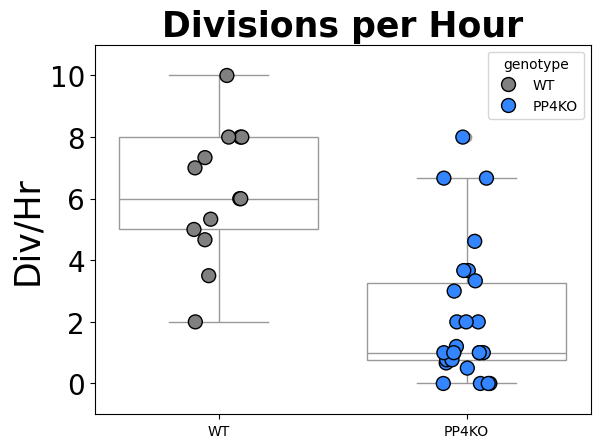

In [7]:
# plotting

p = ['grey', '#3386FF'] # sets palette
axes_title = 25 # axes title size
tick_size = 20 # axes tick size
title = 'Divisions per Hour' # graph title
title_size = 25 # graph title size

# generates stripplot
sns.stripplot(data = data, y = 'div/hour', x = 'genotype',
             hue = 'genotype', dodge = False,
             hue_order = ['WT', 'PP4KO'], palette = p,
             size = 10, edgecolor = 'k', linewidth = 1,
             legend = True)

# generates boxplots
sns.boxplot(data = data, y = 'div/hour', x = 'genotype',
             hue = 'genotype', dodge = False,
             hue_order = ['WT', 'PP4KO'], palette = ['w', 'w'], 
           legend = False)

plt.xlabel('') # removes x axis label
plt.ylabel('Div/Hr', fontsize = axes_title) # modifies y axis label
plt.yticks(size = tick_size) # sets y-tick size to match assigned value
plt.title(title, fontsize = title_size, fontweight = 'bold') # sets title parameters
plt.ylim(-1,11)

# saving figure
#os.chdir(figs_dir)
#plt.savefig('AC-Cytoplasm Ratio, WT and recomb.png', dpi = 600, bbox_inches = 'tight')
#plt.savefig('Div per hr.svg', dpi = 600, bbox_inches = 'tight')
plt.show(); # shows figure in notebook

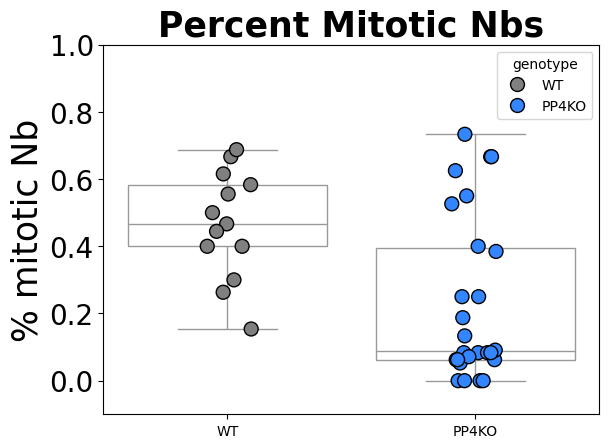

In [8]:
# plotting

p = ['grey', '#3386FF'] # sets palette
axes_title = 25 # axes title size
tick_size = 20 # axes tick size
title = 'Percent Mitotic Nbs' # graph title
title_size = 25 # graph title size

# generates stripplot
sns.stripplot(data = data, y = '% mitotic Nb', x = 'genotype',
             hue = 'genotype', dodge = False,
             hue_order = ['WT', 'PP4KO'], palette = p,
             size = 10, edgecolor = 'k', linewidth = 1,
             legend = True)

# generates boxplots
sns.boxplot(data = data, y = '% mitotic Nb', x = 'genotype',
             hue = 'genotype', dodge = False,
             hue_order = ['WT', 'PP4KO'], palette = ['w', 'w'], 
           legend = False)

plt.xlabel('') # removes x axis label
plt.ylabel('% mitotic Nb', fontsize = axes_title) # modifies y axis label
plt.yticks(size = tick_size) # sets y-tick size to match assigned value
plt.title(title, fontsize = title_size, fontweight = 'bold') # sets title parameters
plt.ylim(-0.1,1)

# saving figure
#os.chdir(figs_dir)
#plt.savefig('AC-Cytoplasm Ratio, WT and recomb.png', dpi = 600, bbox_inches = 'tight')
#plt.savefig('mitotic nb.svg', dpi = 600, bbox_inches = 'tight')
plt.show(); # shows figure in notebook

# Stats Table

In [9]:
stats_table = pd.DataFrame(columns = ['control variable', 'experimental variable', 'phase', 'test', 'y-value',
                                      'control n', 'experimental n',
                                      'control mean', 'experimental mean',
                                     'control stdev', 'experimental stdev',
                                     'test statistic', 'degrees of freedom', 
                                     'critical value', 'p-value'])

pd.set_option('display.float_format', '{:.2E}'.format) # enables scientific notation

stats_table

,control variable,experimental variable,phase,test,y-value,control n,experimental n,control mean,experimental mean,control stdev,experimental stdev,test statistic,degrees of freedom,critical value,p-value


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, mannwhitneyu, shapiro, levene

# Set up the stats table
stats_table = pd.DataFrame(columns=['control variable', 'experimental variable', 'phase', 'test', 'y-value',
                                    'control n', 'experimental n',
                                    'control mean', 'experimental mean',
                                    'control stdev', 'experimental stdev',
                                    'test statistic', 'degrees of freedom', 
                                    'critical value', 'p-value', 'significance'])

pd.set_option('display.float_format', '{:.2E}'.format)  # Scientific notation for p-values

# List of tests to iterate through
tests = [
    ['WT', 'PP4KO', '# Nb'],
    ['WT', 'PP4KO', 'div/hour'],
    ['WT', 'PP4KO', '% mitotic Nb']
]

# Function to determine appropriate test
def is_parametric(data1, data2, alpha=0.05):
    # Check if data is numeric
    continuous = all(isinstance(x, (int, float)) for x in data1) and \
                 all(isinstance(x, (int, float)) for x in data2)
    if not continuous:
        return {'suitable_for_ttest': False, 'suggested_test': "Mann-Whitney U test"}

    # Shapiro-Wilk test for normality
    normality1 = shapiro(data1).pvalue > alpha
    normality2 = shapiro(data2).pvalue > alpha
    normality = normality1 and normality2

    # Levene's test for equal variances
    equal_variance = levene(data1, data2).pvalue > alpha

    # Determine if suitable for t-test
    suitable_for_ttest = normality and equal_variance
    suggested_test = "t-test" if suitable_for_ttest else "Mann-Whitney U test"

    return {'suitable_for_ttest': suitable_for_ttest, 'suggested_test': suggested_test}

# Iterate through tests
for i, test_params in enumerate(tests):
    control_var, experimental_var, y_value = test_params

    # Subset data for the current test
    param1 = data[(data['genotype'] == control_var)][y_value].dropna()
    param2 = data[(data['genotype'] == experimental_var)][y_value].dropna()

    # Populate descriptive stats
    stats_table.loc[i, 'control variable'] = control_var
    stats_table.loc[i, 'experimental variable'] = experimental_var
    stats_table.loc[i, 'y-value'] = y_value
    stats_table.loc[i, 'control n'] = len(param1)
    stats_table.loc[i, 'experimental n'] = len(param2)
    stats_table.loc[i, 'control mean'] = param1.mean()
    stats_table.loc[i, 'experimental mean'] = param2.mean()
    stats_table.loc[i, 'control stdev'] = param1.std()
    stats_table.loc[i, 'experimental stdev'] = param2.std()

    # Determine appropriate test
    test_result = is_parametric(param1, param2)
    suggested_test = test_result['suggested_test']

    if suggested_test == "t-test":
        t_stat, p_value = ttest_ind(param1, param2)
        stats_table.loc[i, 'test'] = "Unpaired Student's T-test"
        stats_table.loc[i, 'test statistic'] = t_stat
        stats_table.loc[i, 'degrees of freedom'] = len(param1) + len(param2) - 2
        stats_table.loc[i, 'critical value'] = "N/A"  # Not applicable for this summary
    else:
        u_stat, p_value = mannwhitneyu(param1, param2, alternative='two-sided')
        stats_table.loc[i, 'test'] = "Mann-Whitney U Test"
        stats_table.loc[i, 'test statistic'] = u_stat
        stats_table.loc[i, 'degrees of freedom'] = "N/A"  # Not applicable for this test
        stats_table.loc[i, 'critical value'] = "N/A"  # Not applicable for this test

    # Record p-value in scientific notation
    stats_table.loc[i, 'p-value'] = f"{p_value:.5e}"

    # Add significance stars
    if p_value < 0.0001:
        sig = "****"
    elif p_value < 0.001:
        sig = "***"
    elif p_value < 0.01:
        sig = "**"
    elif p_value < 0.05:
        sig = "*"
    else:
        sig = "ns"
    stats_table.loc[i, 'significance'] = sig

# Display the stats table
stats_table
# saves output stats table
#os.chdir(outs_dir)
#stats_table.to_csv('FIG1 intensity stats.csv')
os.chdir(home_dir)

,control variable,experimental variable,phase,test,y-value,control n,experimental n,control mean,experimental mean,control stdev,experimental stdev,test statistic,degrees of freedom,critical value,p-value,significance
0,WT,PP4KO,NaN,Unpaired Student's T-test,# Nb,13,26,1.58E+01,1.46E+01,2.95E+00,2.73E+00,1.21E+00,37,N/A,2.33061e-01,ns
1,WT,PP4KO,NaN,Mann-Whitney U Test,div/hour,13,26,6.22E+00,2.14E+00,2.15E+00,2.23E+00,3.04E+02,N/A,N/A,5.79235e-05,****
2,WT,PP4KO,NaN,Mann-Whitney U Test,% mitotic Nb,13,26,4.64E-01,2.35E-01,1.61E-01,2.45E-01,2.65E+02,N/A,N/A,4.37307e-03,**


# Mitosis length

In [11]:
data = pd.read_excel('SuppFig1 data.xlsx', sheet_name = 'Sheet2')
data.head(5)

,file,genotype,time res,prometaphase,telophase,mitotic length
0,2020-09-24_PP4KO-Asl-Nb1,PP4KO,3.00E+00,9,13,1.20E+01
1,2020-09-24_PP4KO-Asl-Nb2,PP4KO,3.00E+00,18,22,1.20E+01
2,2020-09-24_PP4KO-Asl-Nb3,PP4KO,3.00E+00,25,31,1.80E+01
3,2020-09-24_PP4KO-Asl-Nb4,PP4KO,3.00E+00,6,11,1.50E+01
4,2020-09-24_PP4KO-Asl-Nb5,PP4KO,3.00E+00,26,32,1.80E+01


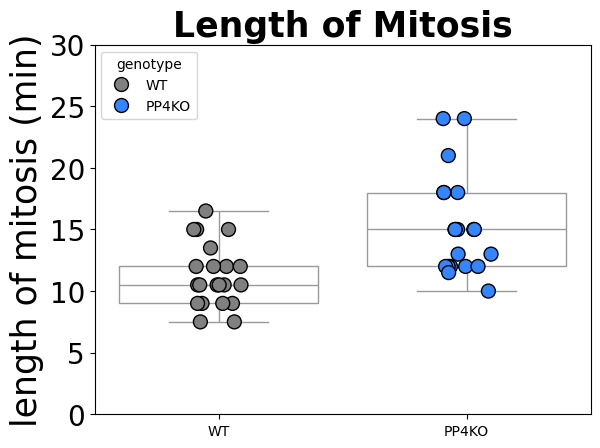

In [12]:
# plotting

p = ['grey', '#3386FF'] # sets palette
axes_title = 25 # axes title size
tick_size = 20 # axes tick size
title = 'Length of Mitosis' # graph title
title_size = 25 # graph title size

# generates stripplot
sns.stripplot(data = data, y = 'mitotic length', x = 'genotype',
             hue = 'genotype', dodge = False,
             order = ['WT', 'PP4KO'], hue_order = ['WT', 'PP4KO'], palette = p,
             size = 10, edgecolor = 'k', linewidth = 1,
             legend = True)

# generates boxplots
sns.boxplot(data = data, y = 'mitotic length', x = 'genotype',
             hue = 'genotype', dodge = False,
             order = ['WT', 'PP4KO'], hue_order = ['WT', 'PP4KO'], palette = ['w', 'w'], 
           legend = False)

plt.xlabel('') # removes x axis label
plt.ylabel('length of mitosis (min)', fontsize = axes_title) # modifies y axis label
plt.yticks(size = tick_size) # sets y-tick size to match assigned value
plt.title(title, fontsize = title_size, fontweight = 'bold') # sets title parameters
plt.ylim(0,30)

# saving figure
#os.chdir(figs_dir)
#plt.savefig('AC-Cytoplasm Ratio, WT and recomb.png', dpi = 600, bbox_inches = 'tight')
#plt.savefig('mitotic length.svg', dpi = 600, bbox_inches = 'tight')
plt.show(); # shows figure in notebook

# Stats Table

In [13]:
stats_table = pd.DataFrame(columns = ['control variable', 'experimental variable', 'phase', 'test', 'y-value',
                                      'control n', 'experimental n',
                                      'control mean', 'experimental mean',
                                     'control stdev', 'experimental stdev',
                                     'test statistic', 'degrees of freedom', 
                                     'critical value', 'p-value'])

pd.set_option('display.float_format', '{:.2E}'.format) # enables scientific notation

stats_table

,control variable,experimental variable,phase,test,y-value,control n,experimental n,control mean,experimental mean,control stdev,experimental stdev,test statistic,degrees of freedom,critical value,p-value


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, mannwhitneyu, shapiro, levene

# Set up the stats table
stats_table = pd.DataFrame(columns=['control variable', 'experimental variable', 'phase', 'test', 'y-value',
                                    'control n', 'experimental n',
                                    'control mean', 'experimental mean',
                                    'control stdev', 'experimental stdev',
                                    'test statistic', 'degrees of freedom', 
                                    'critical value', 'p-value', 'significance'])

pd.set_option('display.float_format', '{:.2E}'.format)  # Scientific notation for p-values

# List of tests to iterate through
tests = [
    ['WT', 'PP4KO', 'mitotic length'],
    ['WT', 'PP4KO', 'mitotic length']
]

# Function to determine appropriate test
def is_parametric(data1, data2, alpha=0.05):
    # Check if data is numeric
    continuous = all(isinstance(x, (int, float)) for x in data1) and \
                 all(isinstance(x, (int, float)) for x in data2)
    if not continuous:
        return {'suitable_for_ttest': False, 'suggested_test': "Mann-Whitney U test"}

    # Shapiro-Wilk test for normality
    normality1 = shapiro(data1).pvalue > alpha
    normality2 = shapiro(data2).pvalue > alpha
    normality = normality1 and normality2

    # Levene's test for equal variances
    equal_variance = levene(data1, data2).pvalue > alpha

    # Determine if suitable for t-test
    suitable_for_ttest = normality and equal_variance
    suggested_test = "t-test" if suitable_for_ttest else "Mann-Whitney U test"

    return {'suitable_for_ttest': suitable_for_ttest, 'suggested_test': suggested_test}

# Iterate through tests
for i, test_params in enumerate(tests):
    control_var, experimental_var, y_value = test_params

    # Subset data for the current test
    param1 = data[(data['genotype'] == control_var)][y_value].dropna()
    param2 = data[(data['genotype'] == experimental_var)][y_value].dropna()

    # Populate descriptive stats
    stats_table.loc[i, 'control variable'] = control_var
    stats_table.loc[i, 'experimental variable'] = experimental_var
    stats_table.loc[i, 'y-value'] = y_value
    stats_table.loc[i, 'control n'] = len(param1)
    stats_table.loc[i, 'experimental n'] = len(param2)
    stats_table.loc[i, 'control mean'] = param1.mean()
    stats_table.loc[i, 'experimental mean'] = param2.mean()
    stats_table.loc[i, 'control stdev'] = param1.std()
    stats_table.loc[i, 'experimental stdev'] = param2.std()

    # Determine appropriate test
    test_result = is_parametric(param1, param2)
    suggested_test = test_result['suggested_test']

    if suggested_test == "t-test":
        t_stat, p_value = ttest_ind(param1, param2)
        stats_table.loc[i, 'test'] = "Unpaired Student's T-test"
        stats_table.loc[i, 'test statistic'] = t_stat
        stats_table.loc[i, 'degrees of freedom'] = len(param1) + len(param2) - 2
        stats_table.loc[i, 'critical value'] = "N/A"  # Not applicable for this summary
    else:
        u_stat, p_value = mannwhitneyu(param1, param2, alternative='two-sided')
        stats_table.loc[i, 'test'] = "Mann-Whitney U Test"
        stats_table.loc[i, 'test statistic'] = u_stat
        stats_table.loc[i, 'degrees of freedom'] = "N/A"  # Not applicable for this test
        stats_table.loc[i, 'critical value'] = "N/A"  # Not applicable for this test

    # Record p-value in scientific notation
    stats_table.loc[i, 'p-value'] = f"{p_value:.5e}"

    # Add significance stars
    if p_value < 0.0001:
        sig = "****"
    elif p_value < 0.001:
        sig = "***"
    elif p_value < 0.01:
        sig = "**"
    elif p_value < 0.05:
        sig = "*"
    else:
        sig = "ns"
    stats_table.loc[i, 'significance'] = sig

# Display the stats table
stats_table
# saves output stats table
#os.chdir(outs_dir)
#stats_table.to_csv('FIG1 intensity stats.csv')
os.chdir(home_dir)

,control variable,experimental variable,phase,test,y-value,control n,experimental n,control mean,experimental mean,control stdev,experimental stdev,test statistic,degrees of freedom,critical value,p-value,significance
0,WT,PP4KO,NaN,Mann-Whitney U Test,mitotic length,21,20,1.13E+01,1.53E+01,2.54E+00,4.06E+00,8.15E+01,N/A,N/A,7.34524e-04,***
1,WT,PP4KO,NaN,Mann-Whitney U Test,mitotic length,21,20,1.13E+01,1.53E+01,2.54E+00,4.06E+00,8.15E+01,N/A,N/A,7.34524e-04,***


# bar plot of phenotypes

In [16]:
data = pd.read_excel('SuppFig1 data.xlsx', sheet_name = 'Sheet3')
data

,genotype,phenotype,count,percent
0,WT,1X,51,1
1,WT,0X,0,0
2,PP4KO,1X,0,0
3,PP4KO,0X,62,1


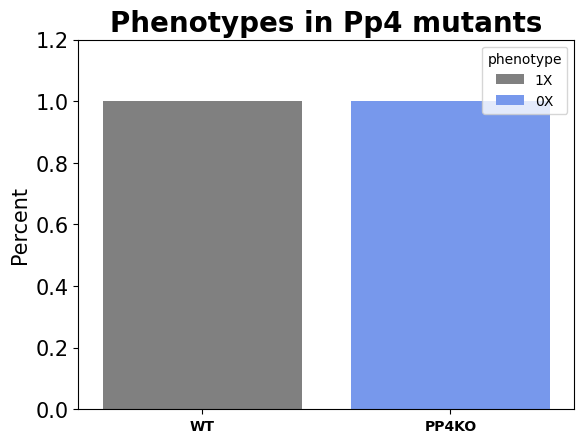

In [17]:
colors = ['grey', '#648FFF']

sns.barplot(x = 'genotype', y = 'percent', data = data,
           hue = 'phenotype', dodge = False, palette = colors)

plt.xticks(rotation = 0, fontweight = 'bold')
plt.xlabel('')
plt.ylabel('Percent', fontsize = 15)
plt.yticks(size = 15)
plt.title('Phenotypes in Pp4 mutants', fontsize = 20, fontweight = 'bold')
plt.ylim(0,1.2)
#plt.savefig('Pp4 mutant counts.svg', dpi = 600,  bbox_inches = 'tight')
plt.show();

